**ANN Model**

In [1]:
#Read the Dataset
import pandas as pd
data=pd.read_csv("/content/sample_data/Data_for_UCI_named.csv")
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [2]:
#Check any null values present in the dataset or not
data.isnull().sum()

,0
tau1,0
tau2,0
tau3,0
tau4,0
p1,0
p2,0
p3,0
p4,0
g1,0
g2,0


In [3]:
#Data Preprocessing
X=data.drop(["stab","stabf"],axis=1)
y=data["stabf"]

In [6]:
#Label Encoding and MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [7]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
#ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6733 - loss: 0.5672 - val_accuracy: 0.8270 - val_loss: 0.3680
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8448 - loss: 0.3372 - val_accuracy: 0.8795 - val_loss: 0.2756
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8868 - loss: 0.2527 - val_accuracy: 0.9070 - val_loss: 0.2211
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.2304 - val_accuracy: 0.9255 - val_loss: 0.1894
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9111 - loss: 0.2040 - val_accuracy: 0.9190 - val_loss: 0.1928
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9191 - loss: 0.1887 - val_accuracy: 0.9305 - val_loss: 0.1721
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9161 - loss: 0.1833 - val_accuracy: 0.9330 - val_loss: 0.1565
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9254 - loss: 0.1736 - val_accuracy: 0.9360 - val_

In [24]:
#Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       712
           1       0.99      0.96      0.97      1288

    accuracy                           0.96      2000
   macro avg       0.96      0.97      0.96      2000
weighted avg       0.97      0.96      0.96      2000

Accuracy: 96.39999999999999


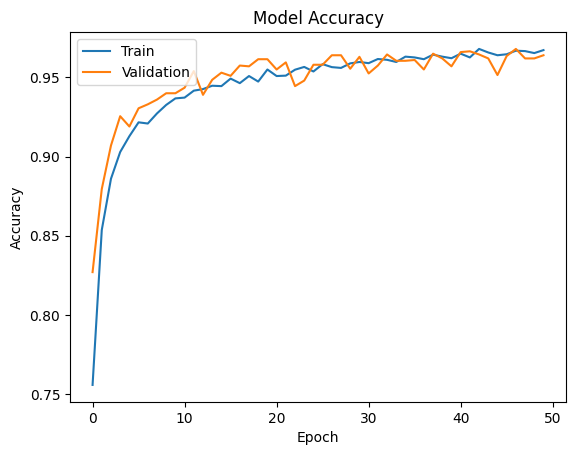

In [26]:
#Plotting the accu and acc_val
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Text(50.722222222222214, 0.5, 'Actual')

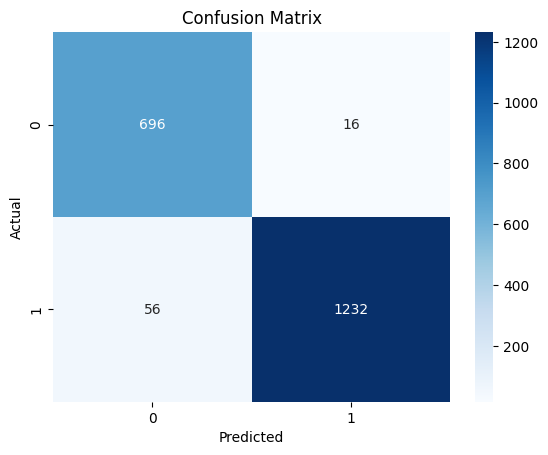

In [30]:
#confusion matrix plotting
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


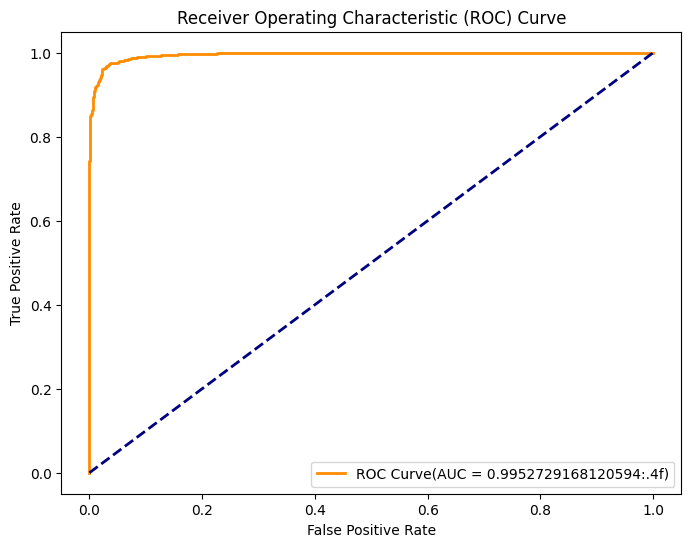

AUC Score: 0.9953


In [31]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve(AUC = {roc_auc}:.4f)')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print(f"AUC Score: {roc_auc:.4f}")